# Project: Problem Statement - Credit Card Customer Segmentation

AllLife Credit Card Customer Segmentation¶
Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

Key Questions:

How many different segments of customers are there?

How are these segments different from each other?

What are your recommendations to the bank on how to better market to and service these customers?

Data Description: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

Customer key - Identifier for the customer

Average Credit Limit - Average credit limit across all the credit cards

Total credit cards - Total number of credit cards

Total visits bank - Total number of bank visits

Total visits online - total number of online visits

Total calls made - Total number of calls made by the customer

Steps to follow:

Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

Calculate average silhouette score for both methods. (5 marks)

Compare K-means clusters with Hierarchical clusters. (5 marks)

Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

# Part One: Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Read the File
cccd = pd.read_csv('credit_card_customers.csv')
cccd.head()

,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
0,1,24519,24310,4,4,7,6
1,2,83742,3334,1,5,4,14
2,3,17629,3668,2,10,3,13
3,4,59213,27616,4,4,5,4
4,5,40128,19473,4,3,9,7


In [3]:
#Check Types 
cccd.dtypes

Serial_No               int64
Customer_Key            int64
Average_Credit_Limit    int64
Total_Credit_Cards      int64
Total_Visits_Bank       int64
Total_Visits_Online     int64
Total_Calls_Made        int64
dtype: object

In [4]:
#Check Statistics
cccd.describe()

,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,50200.347000,24341.012000,4.41200,4.155000,8.357000,6.093000
std,288.819436,25846.669998,18599.140309,2.43026,2.819384,5.451906,4.260106
min,1.000000,10845.000000,1000.000000,1.00000,0.000000,0.000000,0.000000
25%,250.750000,30512.000000,6980.000000,3.00000,2.000000,5.000000,3.000000
50%,500.500000,46820.000000,20134.000000,4.00000,4.000000,8.000000,6.000000
75%,750.250000,69412.000000,40497.500000,5.00000,6.000000,11.000000,9.000000
max,1000.000000,98152.000000,77149.000000,10.00000,10.000000,20.000000,15.000000


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
#Scaling dataset cccd
cccd_scaled = cccd.copy()
cccd_scaled[:] = StandardScaler().fit_transform(cccd_scaled)
cccd_scaled.drop("Customer_Key", axis=1, inplace=True)
cccd_scaled.drop("Serial_No", axis=1, inplace=True)
cols = list(cccd_scaled.columns)
cccd_scaled.head()

/var/folders/40/h6py164d1rv50fxf0z53ckz00000gn/T/ipykernel_39421/3224623530.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.73031962 -1.72685552 -1.72339142 -1.71992731 -1.71646321 -1.71299911
 -1.709535   -1.7060709  -1.7026068  -1.69914269 -1.69567859 -1.69221449
 -1.68875038 -1.68528628 -1.68182218 -1.67835807 -1.67489397 -1.67142987
 -1.66796576 -1.66450166 -1.66103755 -1.65757345 -1.65410935 -1.65064524
 -1.64718114 -1.64371704 -1.64025293 -1.63678883 -1.63332473 -1.62986062
 -1.62639652 -1.62293242 -1.61946831 -1.61600421 -1.61254011 -1.609076
 -1.6056119  -1.6021478  -1.59868369 -1.59521959 -1.59175549 -1.58829138
 -1.58482728 -1.58136318 -1.57789907 -1.57443497 -1.57097087 -1.56750676
 -1.56404266 -1.56057856 -1.55711445 -1.55365035 -1.55018625 -1.54672214
 -1.54325804 -1.53979394 -1.53632983 -1.53286573 -1.52940163 -1.52593752
 -1.52247342 -1.51900932 -1.51554521 -1.51208111 -1.50861701 -1.5051529


,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
0,-0.001668,-0.169614,-0.055004,-0.249028,-0.021841
1,-1.130027,-1.404668,0.299861,-0.799570,1.856986
2,-1.112060,-0.992983,2.074186,-0.983084,1.622133
3,0.176171,-0.169614,-0.055004,-0.616056,-0.491548
4,-0.261864,-0.169614,-0.409869,0.117999,0.213012


In [7]:
#Check Shape of Dataset
cccd.shape

(1000, 7)

In [8]:
cccd.isnull().sum() #0 null values in column

Serial_No               0
Customer_Key            0
Average_Credit_Limit    0
Total_Credit_Cards      0
Total_Visits_Bank       0
Total_Visits_Online     0
Total_Calls_Made        0
dtype: int64

##Customer Key and Serial_No##

Initially, I believed that these two features were not usefull, that Customer key was the intended primary key for a database. Strangely enough, the duplicate records for Customer Key don't match up, this may be that a record was added to the database when the intent was actually to update an existing record, another possibility may be that these are cases of identity theft, or possibly just joint accounts where the Customer Key is shared.

Customer key - Identifier for the customer

In [9]:
group_cccd = cccd.groupby('Customer_Key').count()
print('There are',group_cccd.loc[group_cccd.Total_Calls_Made >=2].shape[1],'dupilicate entries for Customer Key')

There are 6 dupilicate entries for Customer Key


Itrating Dupilate entries

In [10]:
for k in list(group_cccd.loc[group_cccd.Total_Calls_Made >=2].index):
    display(cccd.loc[cccd['Customer_Key']== k])

,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
73,74,12839,2713,1,7,4,10
99,100,12839,5262,2,9,2,14
112,113,12839,4442,2,7,4,12
125,126,12839,18673,3,5,5,7
138,139,12839,50776,7,2,19,2
...,...,...,...,...,...,...,...
944,945,12839,15354,5,3,7,6
957,958,12839,15691,5,3,9,4
970,971,12839,6049,2,9,1,14
983,984,12839,67040,7,2,15,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
91,92,15039,19182,5,3,6,6
104,105,15039,13535,5,4,10,5
117,118,15039,3197,3,6,2,8
130,131,15039,19642,5,4,9,4
143,144,15039,46048,5,2,14,3
...,...,...,...,...,...,...,...
936,937,15039,25494,4,5,5,6
949,950,15039,18947,3,5,7,4
962,963,15039,5660,1,6,5,14
975,976,15039,22206,4,4,6,5


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
97,98,25714,42506,6,1,11,0
110,111,25714,21504,4,5,7,6
123,124,25714,65156,6,0,17,3
136,137,25714,46498,7,0,20,1
149,150,25714,13508,3,5,10,7
...,...,...,...,...,...,...,...
942,943,25714,14370,4,4,7,7
955,956,25714,19281,3,4,8,6
968,969,25714,53746,8,0,16,1
981,982,25714,19074,3,5,8,5


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
93,94,30512,51314,5,2,18,0
106,107,30512,23640,5,5,9,5
119,120,30512,44753,10,0,19,0
132,133,30512,46349,5,2,11,0
145,146,30512,3572,1,8,1,11
...,...,...,...,...,...,...,...
938,939,30512,58396,6,0,13,0
951,952,30512,18263,5,5,7,6
964,965,30512,53504,8,2,16,3
977,978,30512,5725,3,9,4,10


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
25,26,30517,46179,6,0,13,1
63,64,30517,44785,8,0,20,1


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
85,86,34710,22239,3,3,6,4
101,102,34710,19070,3,5,8,6
114,115,34710,56360,5,2,12,2
127,128,34710,11020,3,5,5,7
140,141,34710,64708,9,2,16,0
...,...,...,...,...,...,...,...
946,947,34710,10904,4,3,8,7
959,960,34710,53634,5,0,18,0
972,973,34710,16655,5,3,7,4
985,986,34710,41519,8,0,18,2


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
95,96,41629,15504,3,4,7,5
108,109,41629,49737,10,1,11,2
121,122,41629,23297,5,4,5,5
134,135,41629,13876,3,5,6,5
147,148,41629,32091,6,0,15,1
...,...,...,...,...,...,...,...
940,941,41629,2157,2,10,2,13
953,954,41629,55567,8,1,11,0
966,967,41629,22795,5,4,7,5
979,980,41629,29962,5,4,5,6


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
23,24,41682,5352,4,3,8,6
62,63,41682,21641,4,3,5,4


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
90,91,46820,21782,3,3,7,4
103,104,46820,37714,10,2,15,1
116,117,46820,60414,9,1,12,0
129,130,46820,4726,3,5,4,9
142,143,46820,3554,1,7,5,15
...,...,...,...,...,...,...,...
935,936,46820,20259,5,4,5,4
948,949,46820,34106,6,0,17,3
961,962,46820,15132,4,4,8,4
974,975,46820,18091,5,4,10,4


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
50,51,50613,17916,5,5,9,4
87,88,50613,9163,1,10,4,8
100,101,50613,3629,1,5,5,11
113,114,50613,6447,3,5,4,14
126,127,50613,29944,5,4,6,7
...,...,...,...,...,...,...,...
945,946,50613,3649,1,7,1,13
958,959,50613,20514,5,4,8,4
971,972,50613,45294,5,2,19,2
984,985,50613,20618,3,4,5,5


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
92,93,62408,11982,4,5,7,7
105,106,62408,15375,3,3,8,6
118,119,62408,14446,5,3,8,5
131,132,62408,8676,1,6,0,10
144,145,62408,7869,1,6,1,11
...,...,...,...,...,...,...,...
937,938,62408,18101,3,5,7,5
950,951,62408,6564,1,8,5,8
963,964,62408,5577,1,10,2,9
976,977,62408,16770,5,4,9,4


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
98,99,69412,68924,10,2,10,0
111,112,69412,6875,3,10,4,10
124,125,69412,35949,5,2,18,2
137,138,69412,44712,5,0,17,1
150,151,69412,23847,4,4,5,5
...,...,...,...,...,...,...,...
943,944,69412,3312,1,6,0,13
956,957,69412,16166,5,3,10,5
969,970,69412,59779,8,0,18,2
982,983,69412,1694,3,8,5,15


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
96,97,80345,2969,3,6,0,11
109,110,80345,5695,1,7,0,8
122,123,80345,6382,2,9,0,8
135,136,80345,47741,9,2,15,3
148,149,80345,6366,2,5,2,10
...,...,...,...,...,...,...,...
941,942,80345,6549,1,8,2,9
954,955,80345,6411,2,6,5,8
967,968,80345,24180,5,4,10,6
980,981,80345,42752,6,0,11,3


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
86,87,82156,6187,1,10,1,8
102,103,82156,6604,1,5,3,8
115,116,82156,17180,4,4,8,6
128,129,82156,1785,1,7,3,8
141,142,82156,38670,6,2,10,1
...,...,...,...,...,...,...,...
947,948,82156,4790,1,8,0,11
960,961,82156,21961,4,3,8,6
973,974,82156,5578,1,8,2,13
986,987,82156,20230,4,3,10,7


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
64,65,97821,24601,5,4,10,5
94,95,97821,4812,2,5,3,14
107,108,97821,3923,1,10,3,10
120,121,97821,6215,2,5,1,11
133,134,97821,5551,1,9,3,10
...,...,...,...,...,...,...,...
939,940,97821,50738,10,1,12,0
952,953,97821,21428,4,5,9,5
965,966,97821,55622,10,1,14,2
978,979,97821,20659,4,4,8,4


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Average Credit Limit - Average credit limit across all the credit cards

/var/folders/40/h6py164d1rv50fxf0z53ckz00000gn/T/ipykernel_39421/614137472.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cccd.Average_Credit_Limit);
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


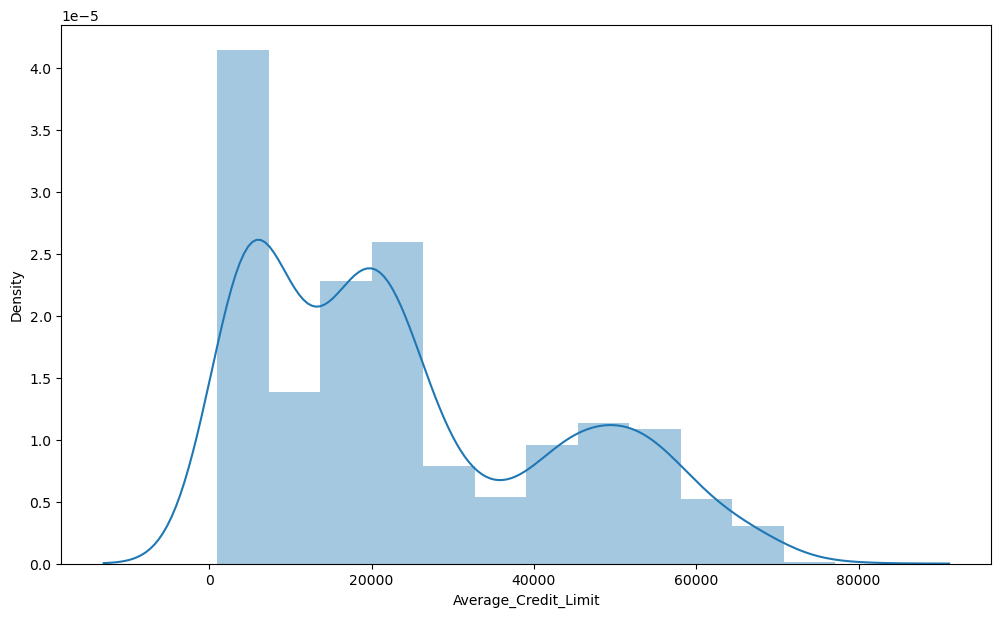

In [12]:
plt.figure(figsize=(12,7))
sns.distplot(cccd.Average_Credit_Limit);

Interpitation- The majority of records do not have credit or have a low limit.

# Total credit cards - Total number of credit cards

/var/folders/40/h6py164d1rv50fxf0z53ckz00000gn/T/ipykernel_39421/3607383953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cccd.Total_Credit_Cards);
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


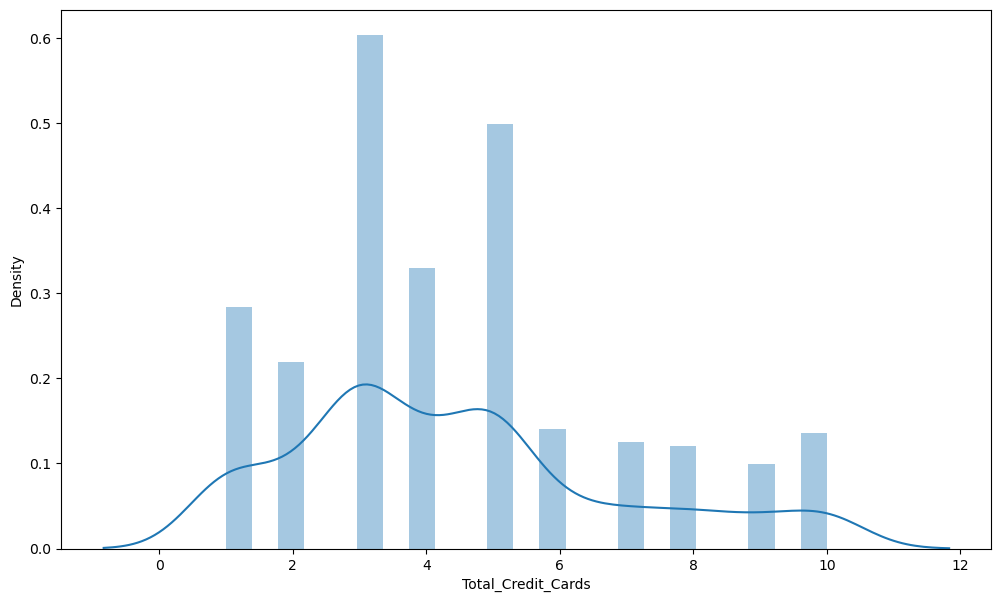

In [13]:
plt.figure(figsize=(12,7))
sns.distplot(cccd.Total_Credit_Cards);

Interpitation- Looks to be normally distributed. 

# Total visits bank - Total number of bank visits

/var/folders/40/h6py164d1rv50fxf0z53ckz00000gn/T/ipykernel_39421/963004397.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cccd.Total_Visits_Bank);
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


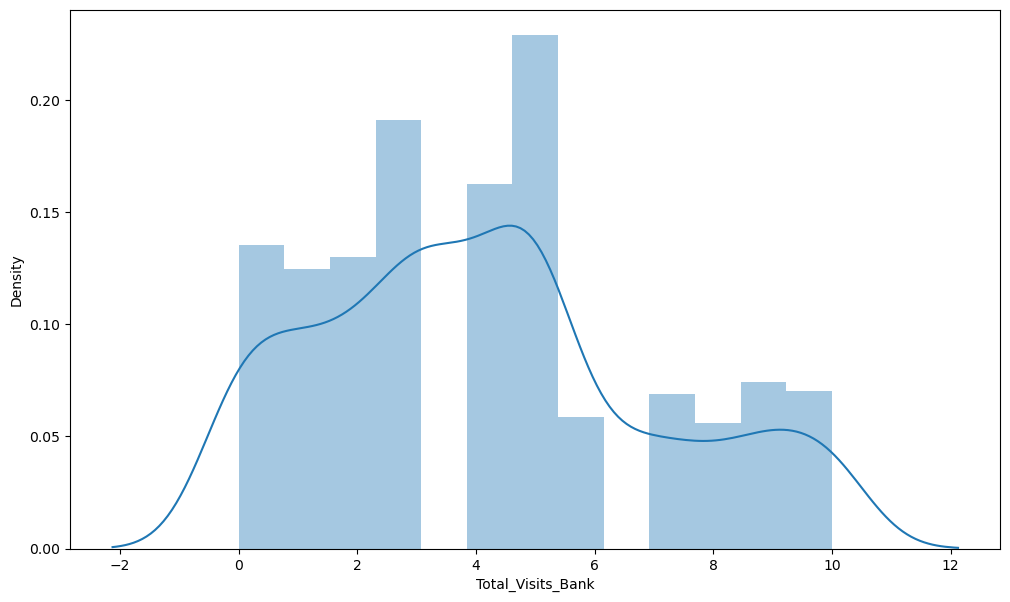

In [14]:
#Total visits bank - Total number of bank visits
plt.figure(figsize=(12,7))
sns.distplot(cccd.Total_Visits_Bank);

Interpitation- feature interaction. 

# Total visits online - total number of online visits

/var/folders/40/h6py164d1rv50fxf0z53ckz00000gn/T/ipykernel_39421/4207108213.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cccd.Total_Visits_Online);
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


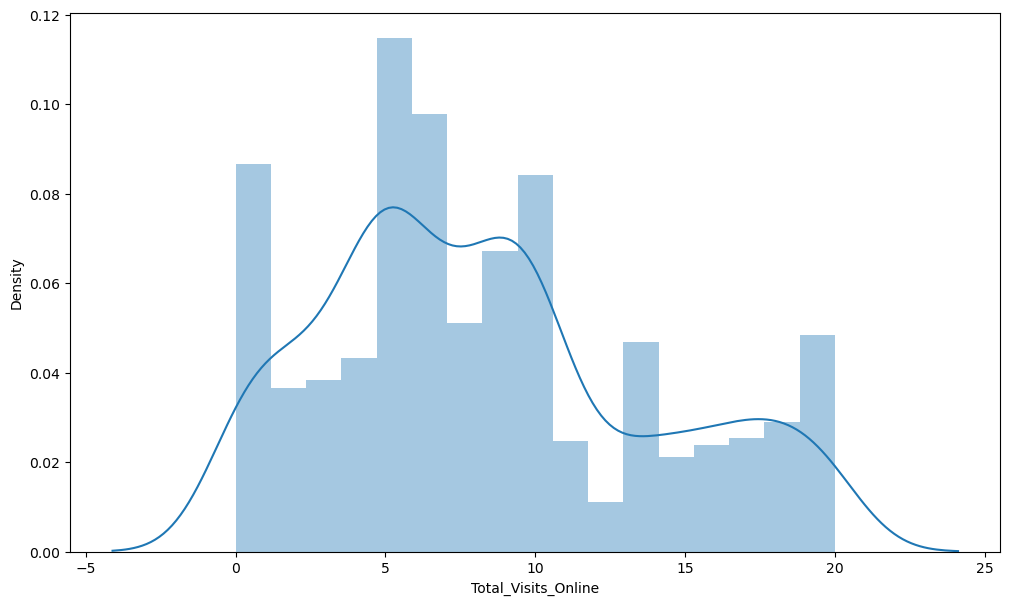

In [15]:
#Total visits online - total number of online visits
plt.figure(figsize=(12,7))
sns.distplot(cccd.Total_Visits_Online);

Interpitation- feature interaction

# Total calls made - Total number of calls made by the customer

/var/folders/40/h6py164d1rv50fxf0z53ckz00000gn/T/ipykernel_39421/2553556889.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cccd.Total_Calls_Made);
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


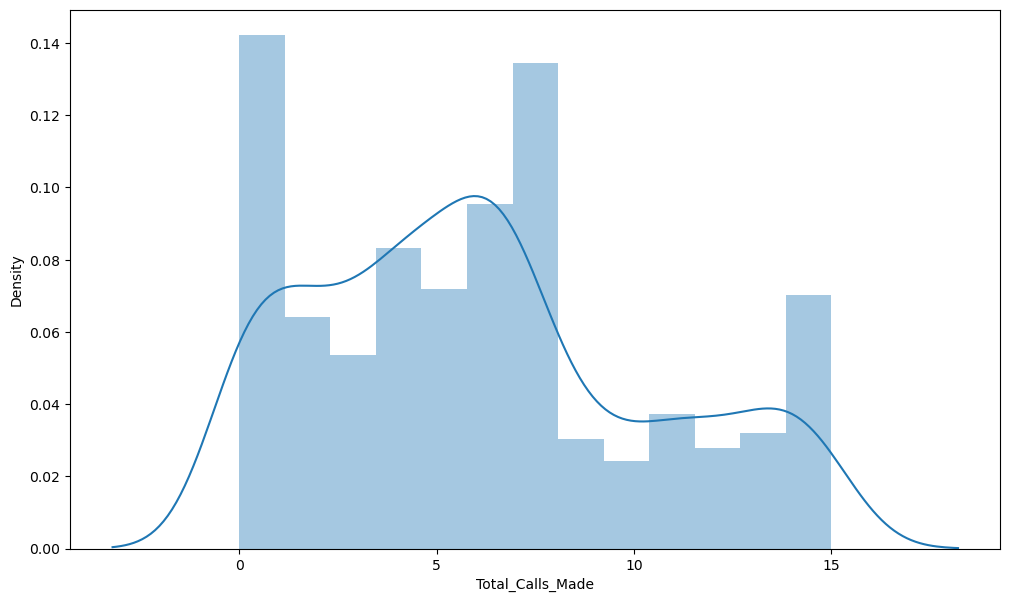

In [16]:
#Total calls made - Total number of calls made by the customer

plt.figure(figsize=(12,7))
sns.distplot(cccd.Total_Calls_Made);

# The two bivariate plots below are useful to see what amount of feature interaction is present.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

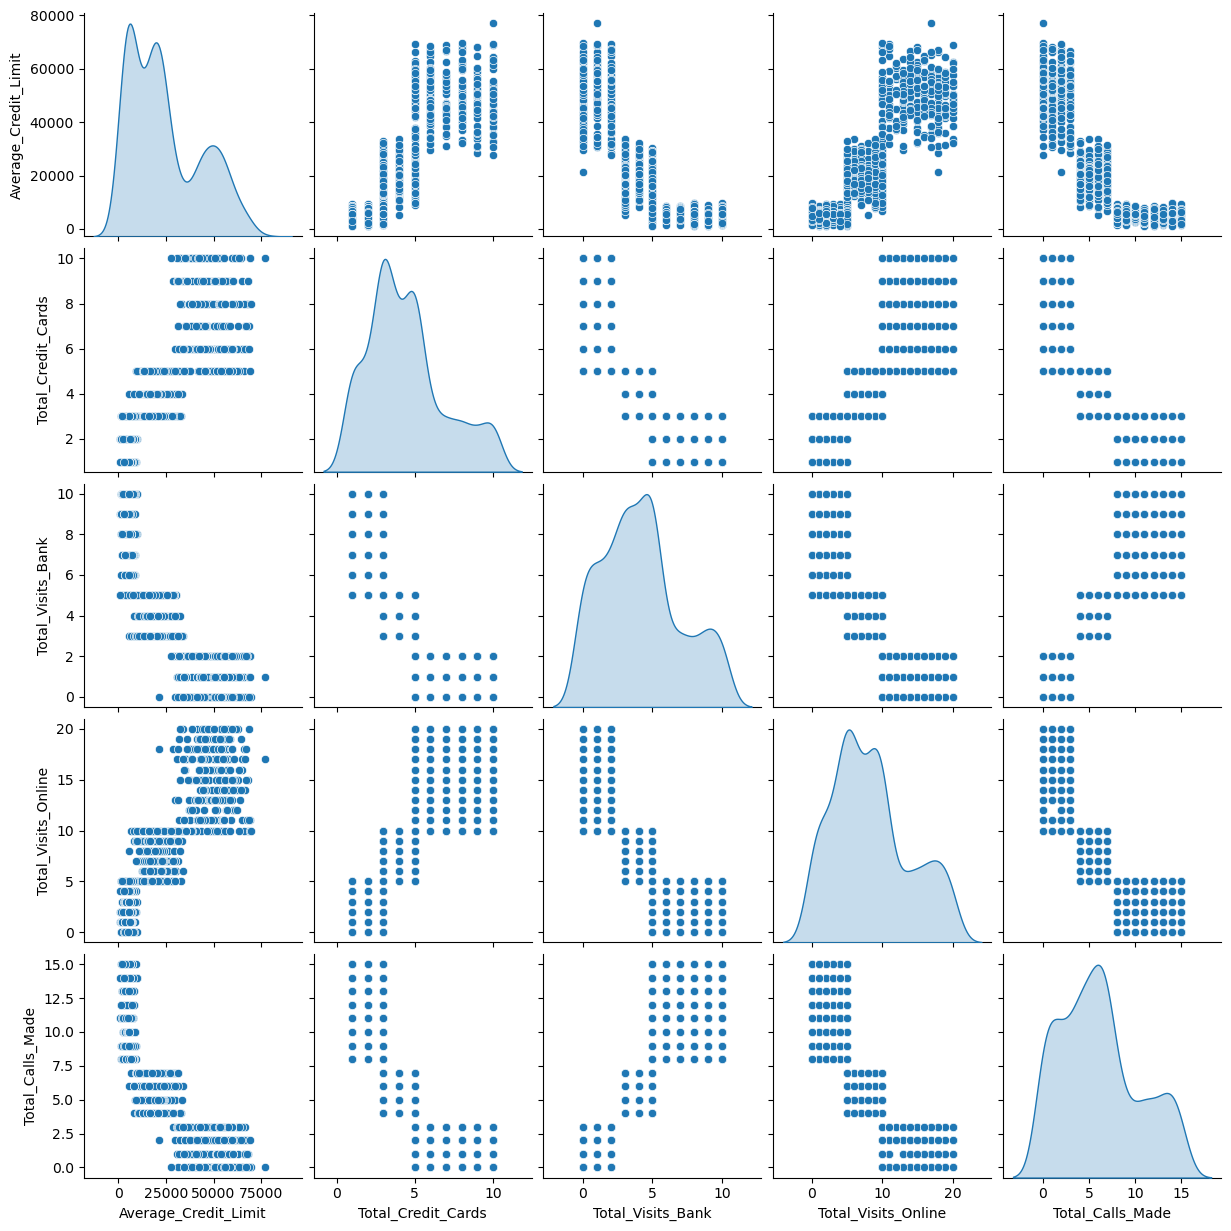

In [17]:
sns.pairplot(cccd[['Average_Credit_Limit', 'Total_Credit_Cards', 'Total_Visits_Bank', 'Total_Visits_Online', 'Total_Calls_Made']], diag_kind='kde');

In [18]:
#Check Correlation
cccd.corr()

,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
Serial_No,1.000000,-0.010401,-0.023229,-0.016630,0.035136,-0.038423,0.030549
Customer_Key,-0.010401,1.000000,0.012909,0.025929,-0.011377,-0.011110,-0.004206
Average_Credit_Limit,-0.023229,0.012909,1.000000,0.818872,-0.827345,0.845581,-0.837683
Total_Credit_Cards,-0.016630,0.025929,0.818872,1.000000,-0.776022,0.796591,-0.785310
Total_Visits_Bank,0.035136,-0.011377,-0.827345,-0.776022,1.000000,-0.803635,0.842962
Total_Visits_Online,-0.038423,-0.011110,0.845581,0.796591,-0.803635,1.000000,-0.818801
Total_Calls_Made,0.030549,-0.004206,-0.837683,-0.785310,0.842962,-0.818801,1.000000


# Ploting Heatmap

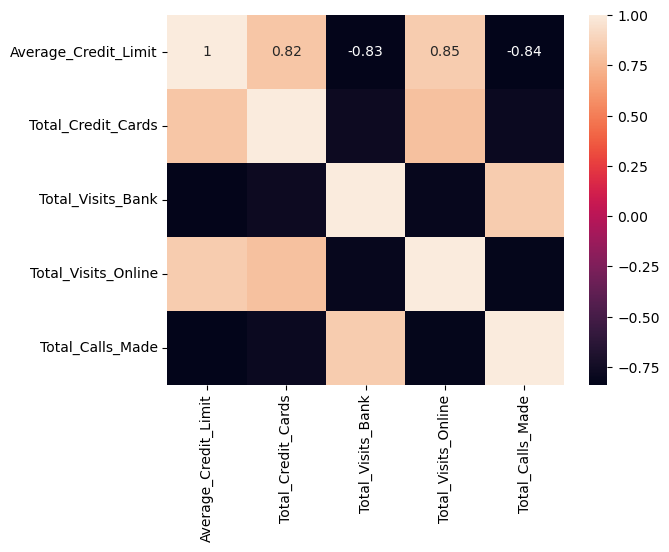

In [19]:
sns.heatmap(cccd[['Average_Credit_Limit', 'Total_Credit_Cards', 'Total_Visits_Bank', 'Total_Visits_Online', 'Total_Calls_Made']].corr(), annot=True);

# A hypothesis that I had going into this was that there would be three clusters for contact method, where customers would stick to their preferred method for interacting with their bank (online, in person, and through the phone). Below we can see a scatter plot which shows my hypothesis was correct.

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


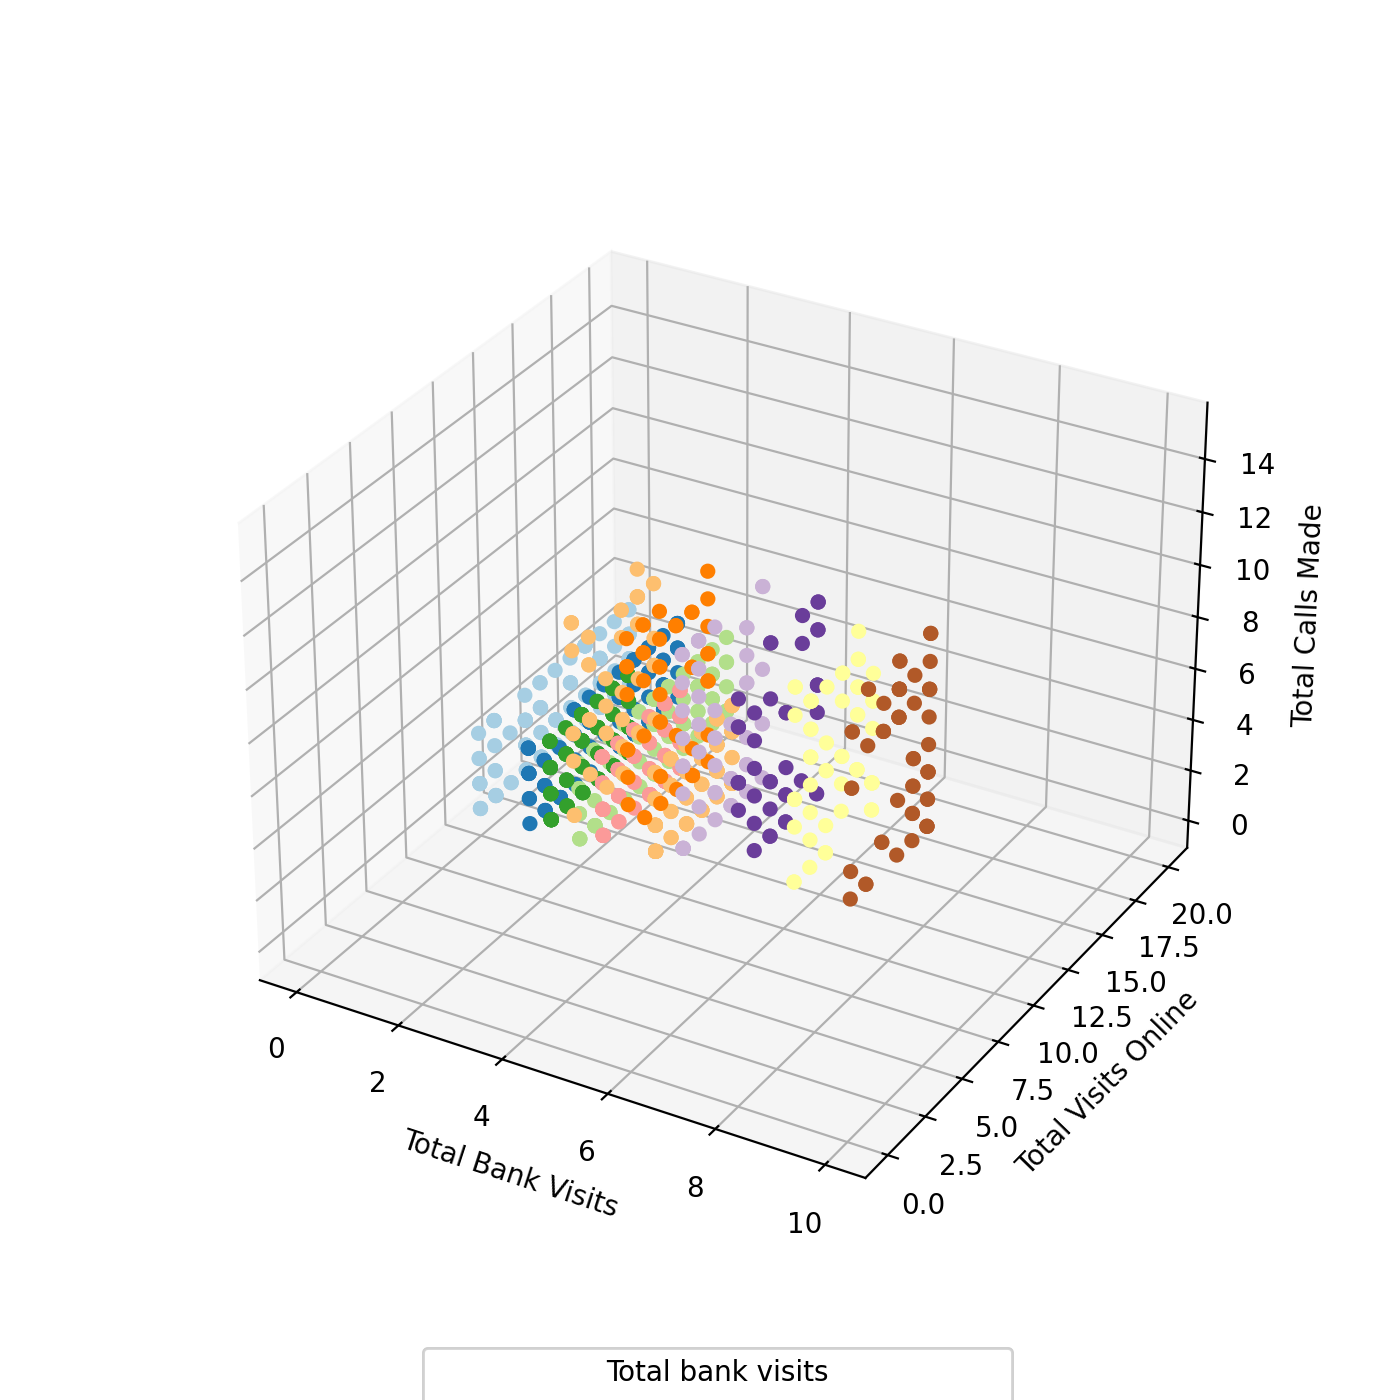

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(projection='3d')

x = cccd.Total_Visits_Bank
y = cccd.Total_Visits_Online
z = cccd.Total_Calls_Made

g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('Total Bank Visits')
ax.set_ylabel('Total Visits Online')
ax.set_zlabel('Total Calls Made')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="Total bank visits", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

plt.show()

# from matplotlib import animation

# def rotate(angle):
#      ax.view_init(azim=angle)

# angle = 1
# plt.show()
# ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=1)
# ani.save('Cluster_plot.gif', writer=animation.PillowWriter(fps=25));

# Part Two: K-means Clustering

In [22]:
# from sklearn.cluster import KMeans

# from scipy.spatial.distance import cdist
# meanDistortions=[]

# fig2 = plt.figure(figsize=(4,4))
# for k in range(1, 10):
#     model=KMeans(n_clusters=k, n_init=10, init = 'k-means++', random_state = 42)
#     model.fit(cccd_scaled)
#     prediction=model.predict(cccd_scaled)
#     meanDistortions.append(sum(np.min(cdist(cccd_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / cccd_scaled.shape[0])


# plt.plot(range(1, 10), meanDistortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Average distortion')
# plt.title('Selecting k with the Elbow Method');
# plt.show()

In [23]:
# model = KMeans(n_clusters=3)
# model.fit(cccd_scaled)
# preds = model.predict(cccd_scaled)

In [24]:
# from sklearn.metrics import silhouette_score
# labels = model.labels_
# silhouette_score(cccd_scaled, labels, metric='euclidean')

In [25]:
# cccd['Kmean_grouping'] = preds #here we add the predictions to the unscaled data so that we can gain some real world interpretability.
# cccd_scaled['Kmean_grouping'] = preds

# cccd.groupby('Kmean_grouping').count()

In [26]:
from sklearn.cluster import KMeans

# Creating an elbow chart to identify k values 

<IPython.core.display.Javascript object>


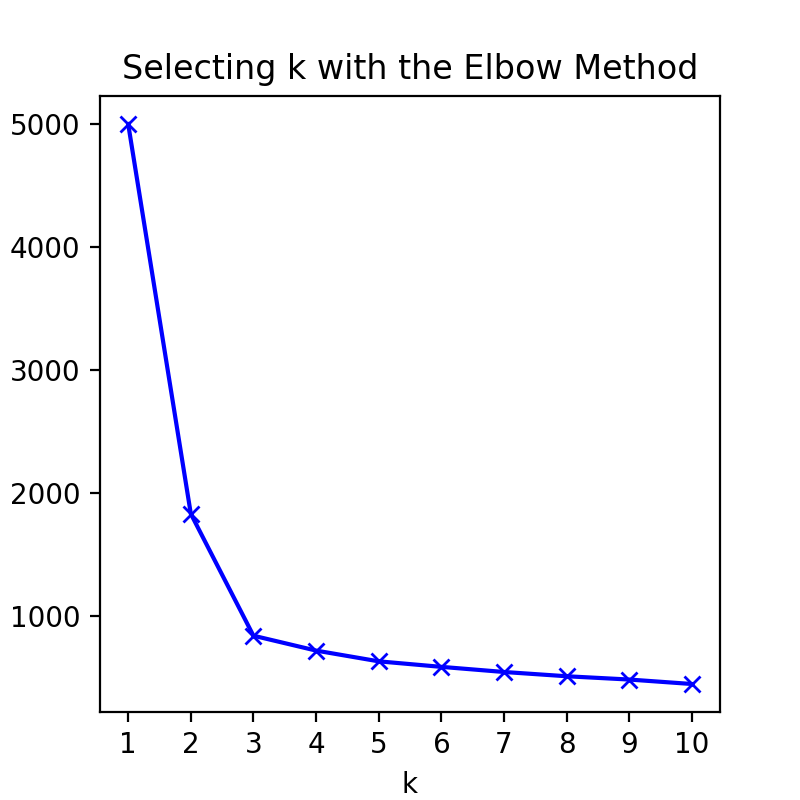

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [27]:
#elbow method for k value 
wcss =[]
fig3 = plt.figure(figsize=(4,4))
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(cccd_scaled)
    wcss.append(kmeans.inertia_)

##Plot elbow curve
plt.plot(range(1, 11), wcss,'bx-')
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Selecting k with the Elbow Method');
plt.show() 


Here we can consider k as 3 (after 3 curves starts flatern)

In [28]:
wcss #meanDiviatian

[5000.0,
 1828.3776092408752,
 836.2452288162956,
 715.2063035604574,
 627.6871789409419,
 582.7526141011928,
 541.0983729234442,
 506.33871151317055,
 479.62525981225804,
 443.3009864546554]

In [29]:
#model
model=KMeans(n_clusters=3)
model.fit(cccd_scaled)
preds=model.predict(cccd_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# silhouette_score

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(cccd_scaled)
    score =silhouette_score(cccd_scaled,kmeans.labels_, metric='euclidean')
    silhouette_coefficients.append(score)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [32]:
silhouette_coefficients

[0.5618689712258169,
 0.557177525143991,
 0.4865291382844212,
 0.4105248760582944,
 0.40013348961132456,
 0.39255880248943764,
 0.22558474001493464,
 0.22332755414601366,
 0.2230451546652621]

<IPython.core.display.Javascript object>


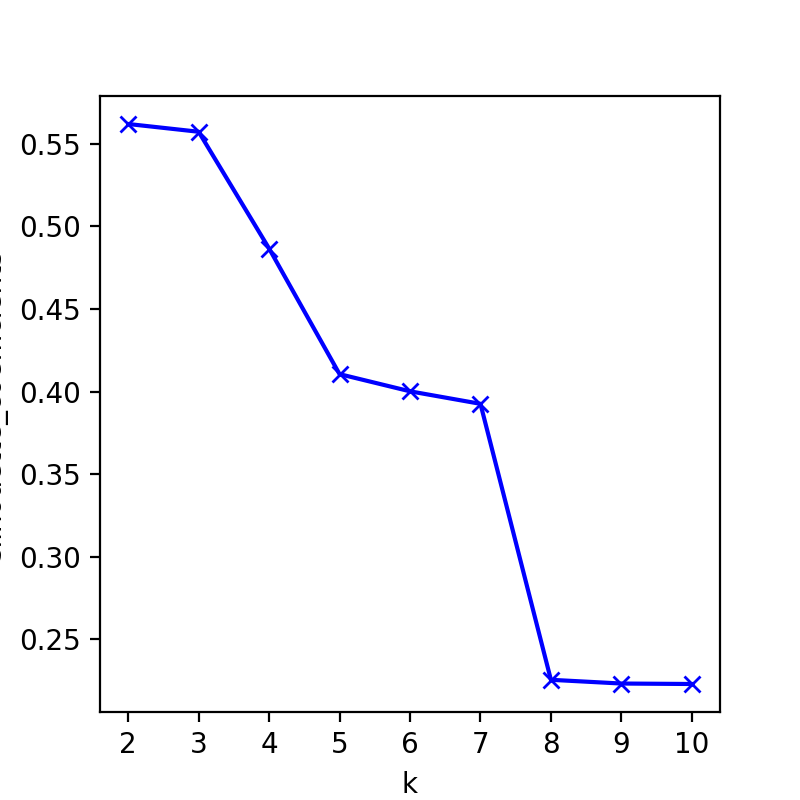

In [33]:
##Plot silhouette_coefficients curve
fig4 = plt.figure(figsize=(4,4))
plt.plot(range(2, 11), silhouette_coefficients,'bx-')
plt.xticks(range(2,11))
plt.xlabel('k')
plt.ylabel('silhouette_coefficients')
plt.show() 

In [34]:
labels = model.labels_
silhouette_score(cccd_scaled, labels, metric='euclidean')

0.557177525143991

In [35]:
cccd['Kmean_grouping'] = preds #here we add the predictions to the unscaled data so that we can gain some real world interpretability.
cccd_scaled['Kmean_grouping'] = preds

cccd.groupby('Kmean_grouping').count()

,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
Kmean_grouping,,,,,,,
0,400,400,400,400,400,400,400
1,300,300,300,300,300,300,300
2,300,300,300,300,300,300,300


In [36]:
cat = cccd.groupby('Kmean_grouping').mean()

# Append std row
cat.loc['Std'] = cccd.std()

# If you know cluster labels represent Phone, Online, In Person
cat.index = ['Phone','Online','In Person','Mean'] if len(cat) == 4 else list(cat.index)
cat


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
Phone,490.672500,47691.807500,20001.305000,4.012500,3.952500,7.557500,5.590000
Online,494.413333,51610.906667,49394.210000,7.383333,0.986667,15.216667,1.353333
In Person,519.690000,52134.506667,5074.090000,1.973333,7.593333,2.563333,11.503333
Mean,288.819436,25846.669998,18599.140309,2.430260,2.819384,5.451906,4.260106


We see the average values for each feature in each cluster, the final row of the dataframe is the mean value for each column
Insights-
1) Customers in the "In Person" cluster, who have the highest average credit limit and number of credit cards, overwhelmingly favor online visits (averaging 15.22 per customer)while minimizing phone calls and bank visits. This suggests that higher-value customers are more digitally oriented, potentially using online tools for efficiency and only engaging other methods when absolutely necessary.

2) Across the clusters, there's a clear trend where higher credit limits correspond to fewer total calls made and bank visits, but more credit cards. For instance, the "Phone" cluster's low credit limit (5,074) coincides with high calls (11.50) and bank visits (7.59), possibly indicating that lower-limit customers require or seek more direct human support, while higher-limit ones handle matters independently online.

3) One more note: If we examine the ratio of online visits to total interactions, the "In Person" cluster stands out at about 87% online-dependent, compared to 44% for the "Online" cluster and just 12% for the "Phone" cluster. This reinforces that digital adoption increases with financial sophistication, contrary to expectations that in-person preferrers might shun online entirely—but the data shows even they lean heavily digital in practice.

<IPython.core.display.Javascript object>


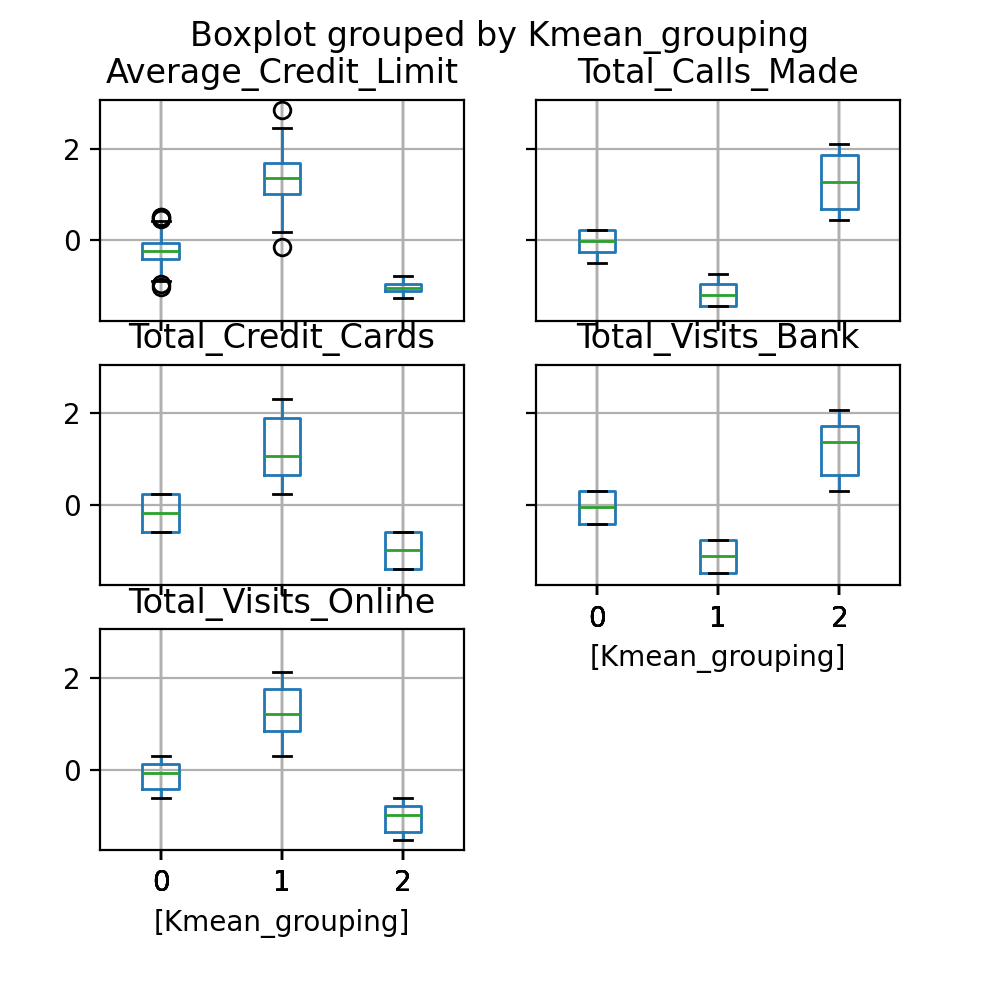

In [37]:
cccd_scaled.boxplot(by='Kmean_grouping', layout=(3,2), figsize=(5,5));

In [38]:
cccd_scaled.drop('Kmean_grouping', inplace=True, axis=1)

# Part Three: Hierarchical Clustering

<IPython.core.display.Javascript object>


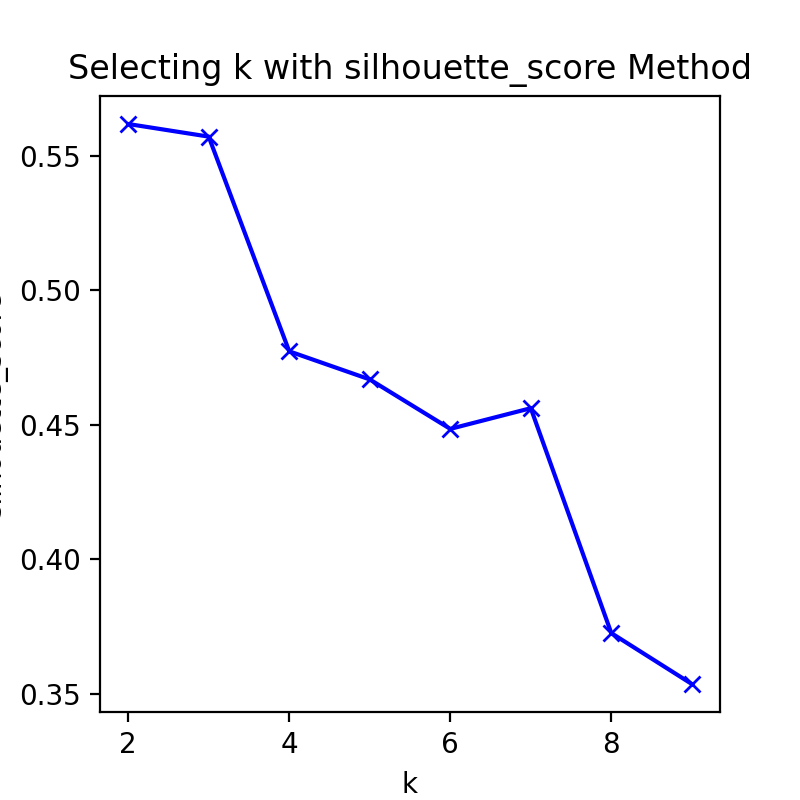

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

In [39]:
from sklearn.cluster import AgglomerativeClustering

wcss=[]

fig6 = plt.figure(figsize=(4,4))

for k in range(2,10):
    model=AgglomerativeClustering(n_clusters=k,affinity='euclidean',  linkage='average')
    model.fit(cccd_scaled)
    prediction=model.labels_
    wcss.append(silhouette_score(cccd_scaled, prediction))


plt.plot(range(2, 10), wcss,'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Selecting k with silhouette_score Method');
plt.show() 

<IPython.core.display.Javascript object>


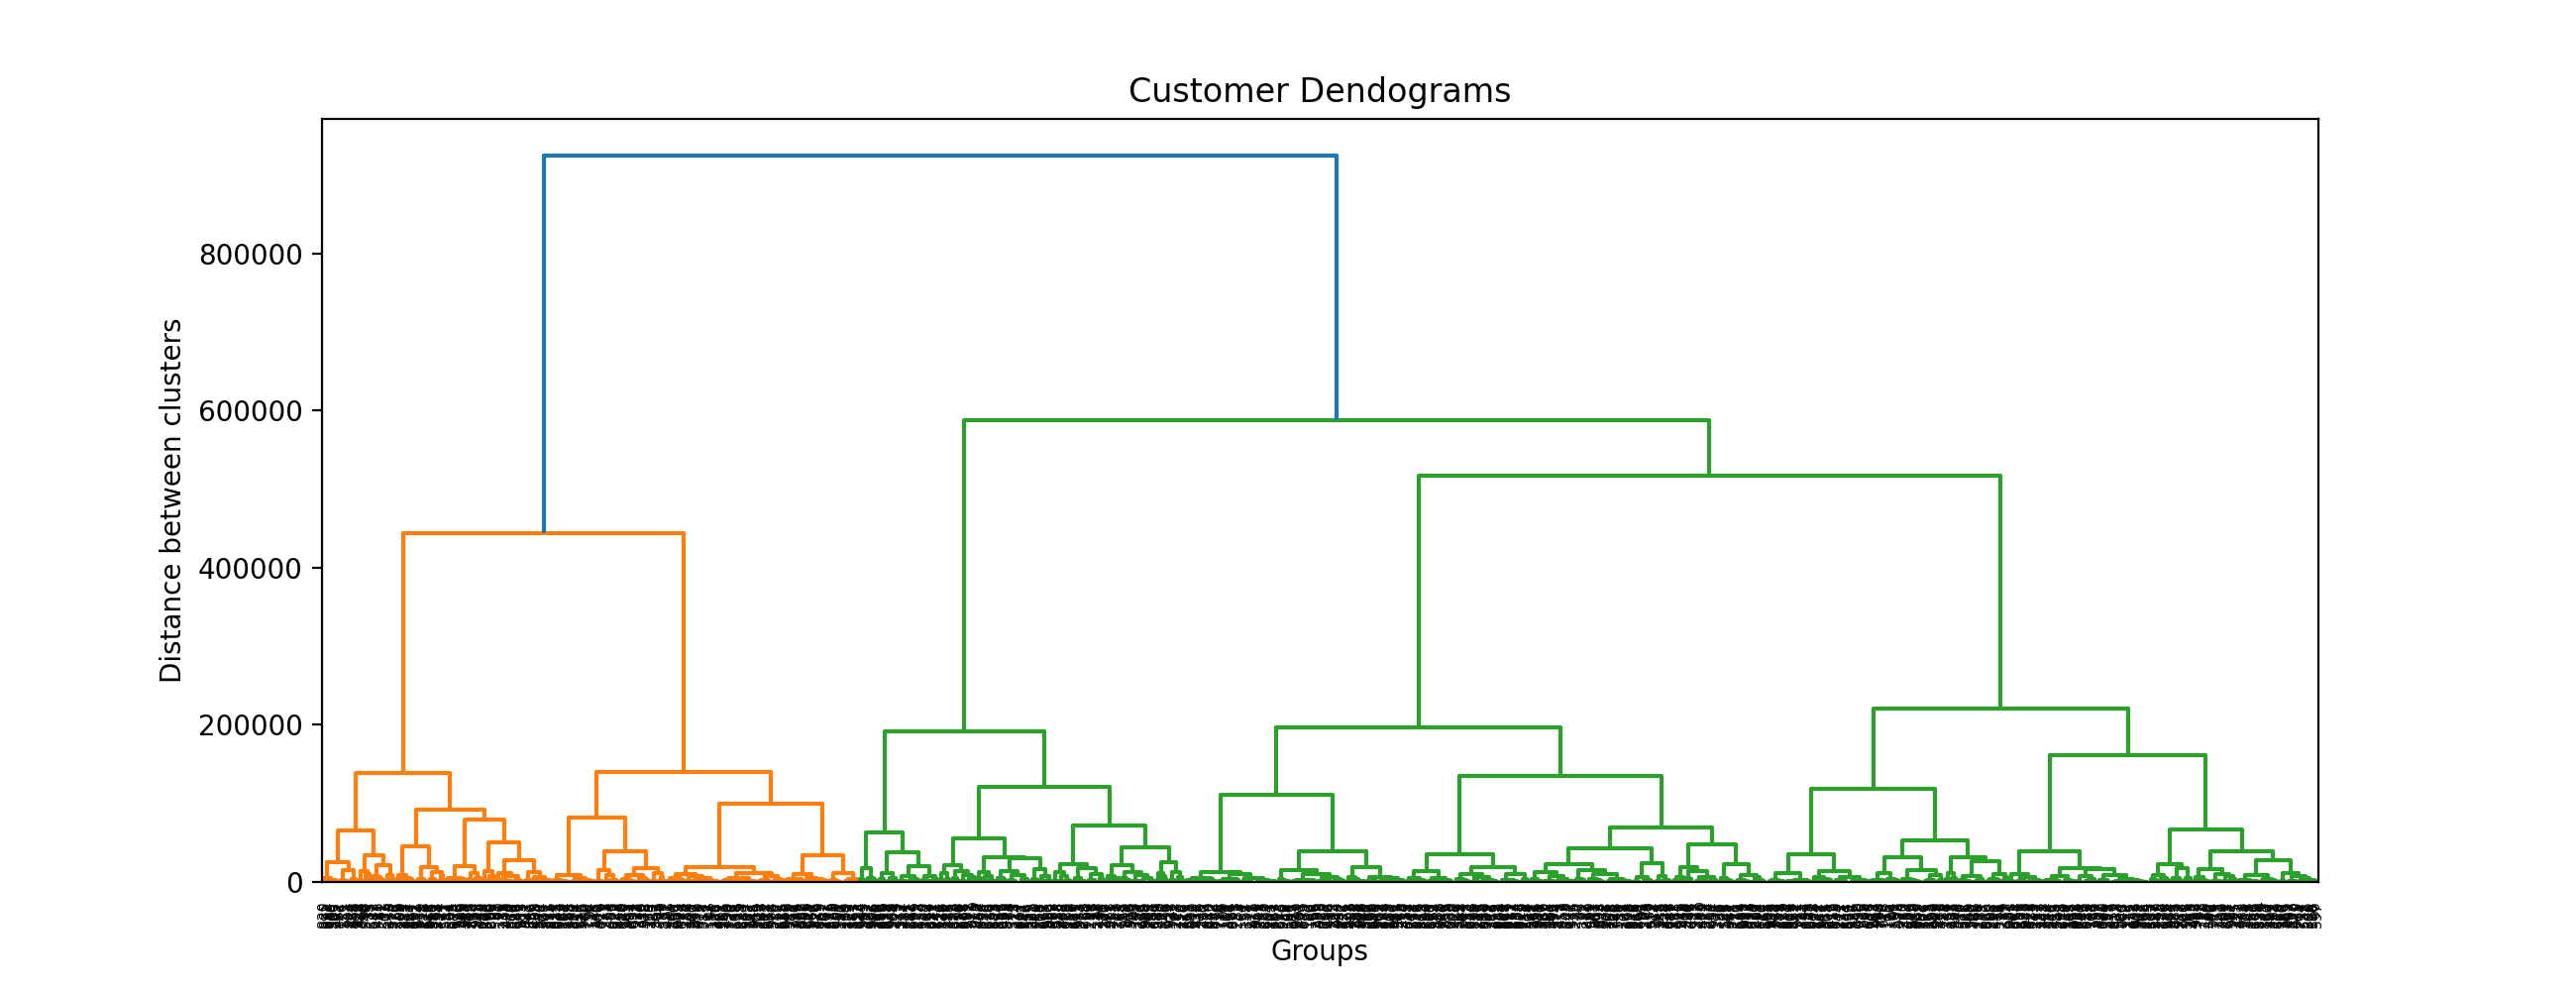

Text(0, 0.5, 'Distance between clusters')

In [40]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(13, 5))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(cccd, method='ward'))
plt.xlabel('Groups')
plt.ylabel('Distance between clusters')

This method resulted in two clusters. It is also worth noting that the online user segment matches the same online user segment from Kmeans. Interestingly enough this division seems to be the users who prefer internet transactions and those who do not. Once again, online users have more credit cards and a larger credit limit.

Not shown below: when using 3, 4, 5, or 6 clusters, all but two of the clusters have less than five records. Obviously, such clusters don't provide meaningful data.

In [41]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(cccd_scaled)
preds=model.labels_
cccd['hc_grouping'] = preds
cccd_scaled['hc_grouping'] = preds

cccd.groupby('hc_grouping').count()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping
hc_grouping,,,,,,,,
0,700,700,700,700,700,700,700,700
1,300,300,300,300,300,300,300,300


In [42]:
H_cat = cccd.groupby('hc_grouping').mean()

# Append std row
H_cat.loc['Std'] = cccd.std()

# If you know cluster labels represent Phone, Online, In Person
H_cat.index = ['Offline','Online','Mean'] if len(H_cat) == 3 else list(H_cat.index)
H_cat


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping
Offline,503.108571,49595.821429,13603.927143,3.138571,5.512857,5.417143,8.124286,0.857143
Online,494.413333,51610.906667,49394.210000,7.383333,0.986667,15.216667,1.353333,1.000000
Mean,288.819436,25846.669998,18599.140309,2.430260,2.819384,5.451906,4.260106,0.831078


The data reveals distinct behavioral and financial patterns across customer clusters:

1)The "Offline" cluster (Kmean_grouping: 0.571429) shows a balanced approach with moderate bank visits (5.51) and online activity (5.41), alongside a low credit limit (13,603.927143) and significant call volume (8.12). This suggests a group that values in-person or phone support.

2)The "Online" cluster (Kmean_grouping: 2.0) stands out with the highest credit limit (49,394.21) and a strong preference for online visits (15.22), with minimal bank visits (0.99) and calls (1.35). This indicates a digitally-savvy, high-value segment that relies heavily on online banking.

3)Comparing interaction totals, the "Online" cluster has the highest overall engagement (15.22 + 1.35 = 16.57 interactions), driven by online usage, while "Offline" follows with 18.24 (5.51 + 5.41 + 8.12), showing broader channel usage. This suggests that higher credit limit customers leverage online tools intensively, while offline customers distribute efforts across methods.

4)A notable trend: higher credit limits correlate with fewer calls and bank visits but more credit cards, with the "Online" group holding 7.38 cards versus 3.19 for "Offline," hinting that financial management skills drives multi-card usage and digital preference.

<IPython.core.display.Javascript object>


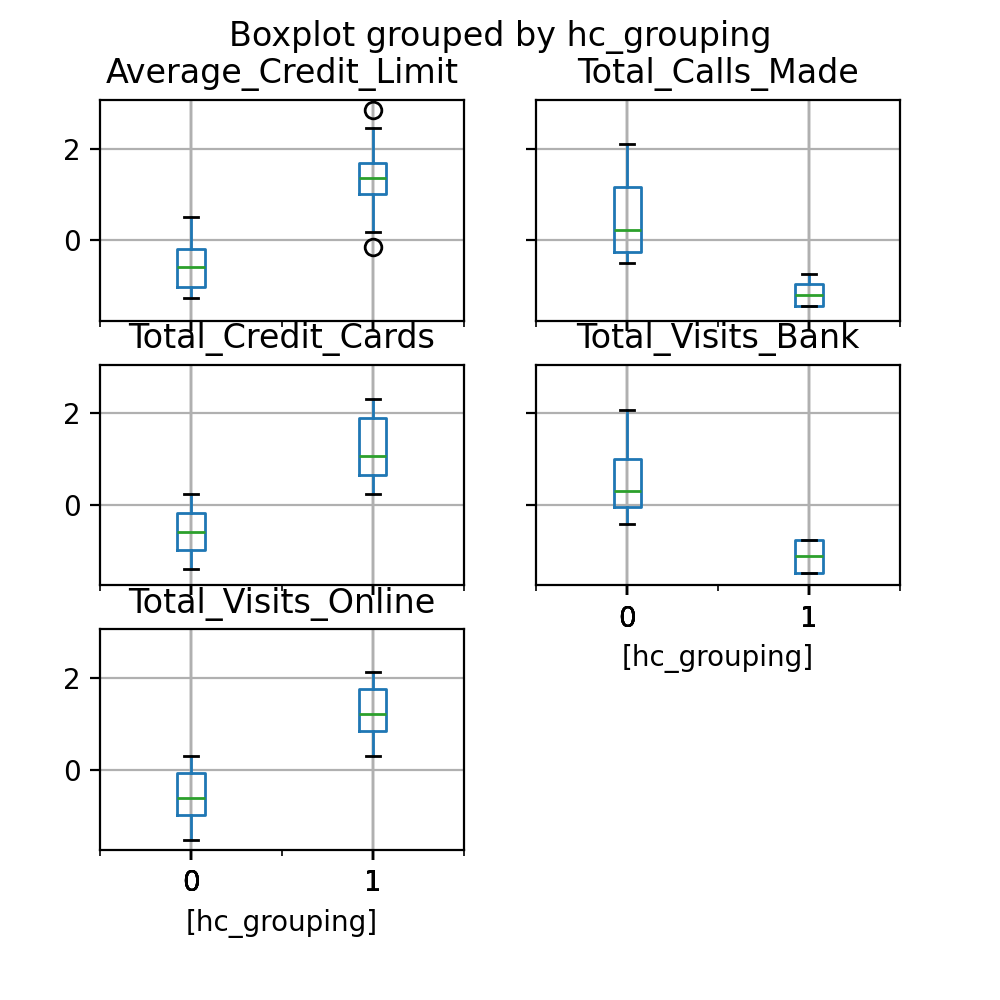

In [43]:
cccd_scaled.boxplot(by='hc_grouping', layout=(3,2), figsize=(5,5));

In [44]:
gb_cccd = cccd.groupby('Customer_Key').count()
print('There are',gb_cccd.loc[gb_cccd.Total_Calls_Made >=2].shape[0], 'duplicate entries for Customer Key')

for k in list(gb_cccd.loc[gb_cccd.Total_Calls_Made >=2].index):
    display(cccd.loc[cccd['Customer_Key'] == k])


There are 15 duplicate entries for Customer Key


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
73,74,12839,2713,1,7,4,10,2,0
99,100,12839,5262,2,9,2,14,2,0
112,113,12839,4442,2,7,4,12,2,0
125,126,12839,18673,3,5,5,7,0,0
138,139,12839,50776,7,2,19,2,1,1
...,...,...,...,...,...,...,...,...,...
944,945,12839,15354,5,3,7,6,0,0
957,958,12839,15691,5,3,9,4,0,0
970,971,12839,6049,2,9,1,14,2,0
983,984,12839,67040,7,2,15,0,1,1


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
91,92,15039,19182,5,3,6,6,0,0
104,105,15039,13535,5,4,10,5,0,0
117,118,15039,3197,3,6,2,8,2,0
130,131,15039,19642,5,4,9,4,0,0
143,144,15039,46048,5,2,14,3,1,1
...,...,...,...,...,...,...,...,...,...
936,937,15039,25494,4,5,5,6,0,0
949,950,15039,18947,3,5,7,4,0,0
962,963,15039,5660,1,6,5,14,2,0
975,976,15039,22206,4,4,6,5,0,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
97,98,25714,42506,6,1,11,0,1,1
110,111,25714,21504,4,5,7,6,0,0
123,124,25714,65156,6,0,17,3,1,1
136,137,25714,46498,7,0,20,1,1,1
149,150,25714,13508,3,5,10,7,0,0
...,...,...,...,...,...,...,...,...,...
942,943,25714,14370,4,4,7,7,0,0
955,956,25714,19281,3,4,8,6,0,0
968,969,25714,53746,8,0,16,1,1,1
981,982,25714,19074,3,5,8,5,0,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
93,94,30512,51314,5,2,18,0,1,1
106,107,30512,23640,5,5,9,5,0,0
119,120,30512,44753,10,0,19,0,1,1
132,133,30512,46349,5,2,11,0,1,1
145,146,30512,3572,1,8,1,11,2,0
...,...,...,...,...,...,...,...,...,...
938,939,30512,58396,6,0,13,0,1,1
951,952,30512,18263,5,5,7,6,0,0
964,965,30512,53504,8,2,16,3,1,1
977,978,30512,5725,3,9,4,10,2,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
25,26,30517,46179,6,0,13,1,1,1
63,64,30517,44785,8,0,20,1,1,1


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
85,86,34710,22239,3,3,6,4,0,0
101,102,34710,19070,3,5,8,6,0,0
114,115,34710,56360,5,2,12,2,1,1
127,128,34710,11020,3,5,5,7,0,0
140,141,34710,64708,9,2,16,0,1,1
...,...,...,...,...,...,...,...,...,...
946,947,34710,10904,4,3,8,7,0,0
959,960,34710,53634,5,0,18,0,1,1
972,973,34710,16655,5,3,7,4,0,0
985,986,34710,41519,8,0,18,2,1,1


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
95,96,41629,15504,3,4,7,5,0,0
108,109,41629,49737,10,1,11,2,1,1
121,122,41629,23297,5,4,5,5,0,0
134,135,41629,13876,3,5,6,5,0,0
147,148,41629,32091,6,0,15,1,1,1
...,...,...,...,...,...,...,...,...,...
940,941,41629,2157,2,10,2,13,2,0
953,954,41629,55567,8,1,11,0,1,1
966,967,41629,22795,5,4,7,5,0,0
979,980,41629,29962,5,4,5,6,0,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
23,24,41682,5352,4,3,8,6,0,0
62,63,41682,21641,4,3,5,4,0,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
90,91,46820,21782,3,3,7,4,0,0
103,104,46820,37714,10,2,15,1,1,1
116,117,46820,60414,9,1,12,0,1,1
129,130,46820,4726,3,5,4,9,2,0
142,143,46820,3554,1,7,5,15,2,0
...,...,...,...,...,...,...,...,...,...
935,936,46820,20259,5,4,5,4,0,0
948,949,46820,34106,6,0,17,3,1,1
961,962,46820,15132,4,4,8,4,0,0
974,975,46820,18091,5,4,10,4,0,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
50,51,50613,17916,5,5,9,4,0,0
87,88,50613,9163,1,10,4,8,2,0
100,101,50613,3629,1,5,5,11,2,0
113,114,50613,6447,3,5,4,14,2,0
126,127,50613,29944,5,4,6,7,0,0
...,...,...,...,...,...,...,...,...,...
945,946,50613,3649,1,7,1,13,2,0
958,959,50613,20514,5,4,8,4,0,0
971,972,50613,45294,5,2,19,2,1,1
984,985,50613,20618,3,4,5,5,0,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
92,93,62408,11982,4,5,7,7,0,0
105,106,62408,15375,3,3,8,6,0,0
118,119,62408,14446,5,3,8,5,0,0
131,132,62408,8676,1,6,0,10,2,0
144,145,62408,7869,1,6,1,11,2,0
...,...,...,...,...,...,...,...,...,...
937,938,62408,18101,3,5,7,5,0,0
950,951,62408,6564,1,8,5,8,2,0
963,964,62408,5577,1,10,2,9,2,0
976,977,62408,16770,5,4,9,4,0,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
98,99,69412,68924,10,2,10,0,1,1
111,112,69412,6875,3,10,4,10,2,0
124,125,69412,35949,5,2,18,2,1,1
137,138,69412,44712,5,0,17,1,1,1
150,151,69412,23847,4,4,5,5,0,0
...,...,...,...,...,...,...,...,...,...
943,944,69412,3312,1,6,0,13,2,0
956,957,69412,16166,5,3,10,5,0,0
969,970,69412,59779,8,0,18,2,1,1
982,983,69412,1694,3,8,5,15,2,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
96,97,80345,2969,3,6,0,11,2,0
109,110,80345,5695,1,7,0,8,2,0
122,123,80345,6382,2,9,0,8,2,0
135,136,80345,47741,9,2,15,3,1,1
148,149,80345,6366,2,5,2,10,2,0
...,...,...,...,...,...,...,...,...,...
941,942,80345,6549,1,8,2,9,2,0
954,955,80345,6411,2,6,5,8,2,0
967,968,80345,24180,5,4,10,6,0,0
980,981,80345,42752,6,0,11,3,1,1


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
86,87,82156,6187,1,10,1,8,2,0
102,103,82156,6604,1,5,3,8,2,0
115,116,82156,17180,4,4,8,6,0,0
128,129,82156,1785,1,7,3,8,2,0
141,142,82156,38670,6,2,10,1,1,1
...,...,...,...,...,...,...,...,...,...
947,948,82156,4790,1,8,0,11,2,0
960,961,82156,21961,4,3,8,6,0,0
973,974,82156,5578,1,8,2,13,2,0
986,987,82156,20230,4,3,10,7,0,0


,Serial_No,Customer_Key,Average_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Kmean_grouping,hc_grouping
64,65,97821,24601,5,4,10,5,0,0
94,95,97821,4812,2,5,3,14,2,0
107,108,97821,3923,1,10,3,10,2,0
120,121,97821,6215,2,5,1,11,2,0
133,134,97821,5551,1,9,3,10,2,0
...,...,...,...,...,...,...,...,...,...
939,940,97821,50738,10,1,12,0,1,1
952,953,97821,21428,4,5,9,5,0,0
965,966,97821,55622,10,1,14,2,1,1
978,979,97821,20659,4,4,8,4,0,0


# Part Four: Key Questions

In [45]:
gb_cccd = cccd.groupby('Customer_Key').count()
print('There are',gb_cccd.loc[gb_cccd.Total_Calls_Made >=2].shape[0], 'duplicate entries for Customer Key')

There are 15 duplicate entries for Customer Key


Thanks for viewing this notebook. If you found this notebook useful or interesting please give it an upvote. I'm always open to constructive feedback. If you have any questions, comments, concerns, or if you would like to collaborate on a future project feel free to leave a comment here or message me directly.